<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This Tutorial Discusses Classification Algorithms Based on Neighbors, KNN, Nearest Centroid, and Radius Neighbors

*Author: Soumya Pal*

*Updated: Stephen Coshatt*

<br/>

**References:**


1.   https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
2.   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3.  https://www.geeksforgeeks.org/ml-nearest-centroid-classifier/
4.  https://machinelearningmastery.com/radius-neighbors-classifier-algorithm-with-python/

##K-Nearest Neighbors (kNN) [Supervised]

"The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems." [1]

kNN algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

"The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other." [1]

### The KNN Algorithm  [1]
1.  Load the data
2.  Initialize K to your chosen number of neighbors
3.  For each example in the data
    <ol>
      <li>Calculate the distance between the query example and the current example from the data.</li>
      <li>Add the distance and the index of the example to an ordered collection</li>
    </ol>
4.  Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5.  Pick the first K entries from the sorted collection
6.  Get the labels of the selected K entries
7.  If regression, return the mean of the K labels
8.  If classification, return the mode of the K labels

### Choosing the right value for K
To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before. [1]

Here are some things to keep in mind:


1.   As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green. [1]
2.   Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far. [1]
3.   In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker. [1]


**Advantages**
*   No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period or derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.
*   Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.
*   KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)
*   Can be used both for Classification and Regression: One of the biggest advantages of K-NN is that K-NN can be used both for classification and regression problems.

**Disadvantages**
*   Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing point is huge which degrades the performance of the algorithm.
*   Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.
*   Requires feature scaling: Feature scaling (standardization and normalization) has to be done before applying KNN algorithm to any dataset, otherwise KNN may generate wrong predictions.
*   Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. So data has to be manipulated to impute missing values and remove outliers.

<br/>

##Nearest Centroid Classifier

The Nearest Centroid (NC) Classifier is one of the most underrated and underutilised classifiers in Machine Learning. However, it is quite powerful and is highly efficient for certain Machine Learning classification tasks. The Nearest Centroid classifier is somewhat similar to the K-Nearest Neighbours classifier. [3]

An often-overlooked principle in Machine Learning is to build simple algorithms off of simple, yet meaningful data, that can do specific tasks efficiently, instead of using complex models. This is also called the principle of sufficiency in statistics. The Nearest Centroid classifier is arguably the simplest Classification algorithm in Machine Learning. The Nearest Centroid classifier works on a simple principle : Given a data point (observation), the Nearest Centroid classifier simply assign it the label (class) of the training sample whose mean or centroid is closest to it.
When applied on text classification, the Nearest Centroid classifier is also called the Rocchio classifier. The scikit-learn library in Python offers a simple function to implement the Nearest Centroid Classifier.

**How the nearest centroid classifier works?**

Basically, what the nearest centroid classifier does can be explained in three steps: [3]

* The centroid for each target class is computed while training.
* After training, given any point, say 'X'. The distances between the point X and each class' centroid is calculated. [3]
* Out of all the calculated distances, the minimum distance is picked. The centroid to which the given point's distance is minimum, it's class is assigned to the given point. [3]

The Nearest Centroid Classifier is quite easy to understand and is one of the simplest classifier algorithms. [3]

<br/>

##Radius Neighbors Classifier

Radius Neighbors is an extension to the k-nearest neighbors algorithm that makes predictions using all examples in the radius of a new example rather than the k-closest neighbors. [4]

As such, the radius-based approach to selecting neighbors is more appropriate for sparse data, preventing examples that are far away in the feature space from contributing to a prediction. [4]

In [1]:
# Run this to clone the ai engine to colab
!git clone https://github.com/sjc230/ai_engine.git

Cloning into 'ai_engine'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 219 (delta 60), reused 194 (delta 35), pack-reused 0
Receiving objects: 100% (219/219), 11.81 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
%cd ai_engine
!git pull
%cd ..

/content/ai_engine
Already up to date.
/content


In [3]:
!pip install sktime
!pip install chart_studio
!python -m pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 915.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.8 MB/s eta 0:00:00


In [4]:
from math import radians
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pathlib import Path

#import streamlit as st

import re
import pytz
from datetime import datetime
from datetime import date

import enum
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, auc, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [5]:
# GET TIME SERIES DATASET
# steps 1, 2 - prepare osuleaf dataset (train and new)
from sktime.datasets import load_italy_power_demand

X_train, y_train = load_italy_power_demand(split="train", return_type="numpy2D")
X_test, y_test = load_italy_power_demand(split="test", return_type="numpy2D")

print("shape of X_train ",X_train.shape)
print("shape of y_train ",y_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_test ",y_test.shape)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

n_classes = int(np.amax(y_train))
print("number of classes is ",n_classes)

shape of X_train  (67, 24)
shape of y_train  (67,)
shape of X_test  (1029, 24)
shape of y_test  (1029,)
number of classes is  2


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=-0.014):
{'knn__algorithm': 'auto', 'knn__leaf_size': 20, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       513
           2       0.95      0.96      0.96       516

    accuracy                           0.96      1029
   macro avg       0.96      0.96      0.96      1029
weighted avg       0.96      0.96      0.96      1029



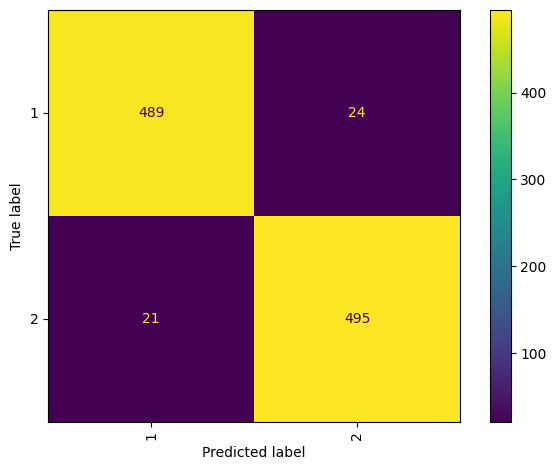

In [6]:
# SETUP & RUN KNN GRIDSEARCH TRAINING & TESTING

# import the classifier builder from the cloned python files
import ai_engine.sk_classifier_builder as skc

knn = skc.pipeBuild_KNeighborsClassifier(n_neighbors=[3,5],weights=['uniform'],algorithm=['auto'],leaf_size=[20,30])


names=['K Nearest Neighbors']
pipes=[knn]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.059):
{'nc__metric': 'euclidean', 'nc__shrink_threshold': None}
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       513
           2       0.95      0.88      0.92       516

    accuracy                           0.92      1029
   macro avg       0.92      0.92      0.92      1029
weighted avg       0.92      0.92      0.92      1029



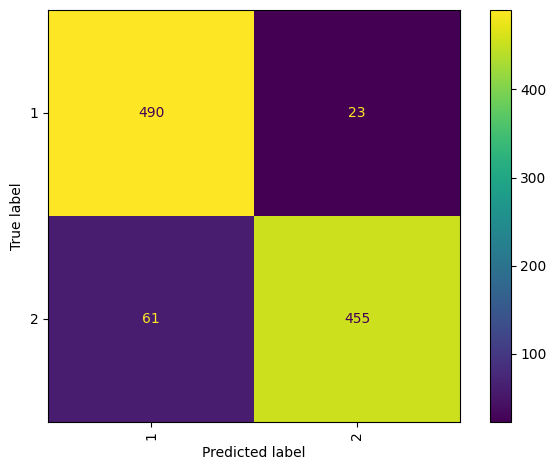

In [7]:
# SETUP & RUN NEAREST CENTROID GRIDSEARCH TRAINING & TESTING

# import the classifier builder from the cloned python files
import ai_engine.sk_classifier_builder as skc

nc = skc.pipeBuild_NearestCentroid()


names=['Nearest Centroid']
pipes=[nc]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.492):
{'radiusNN__algorithm': 'auto', 'radiusNN__leaf_size': 30, 'radiusNN__metric': 'minkowski', 'radiusNN__p': 2, 'radiusNN__radius': 10, 'radiusNN__weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.50      1.00      0.67       513
           2       0.00      0.00      0.00       516

    accuracy                           0.50      1029
   macro avg       0.25      0.50      0.33      1029
weighted avg       0.25      0.50      0.33      1029



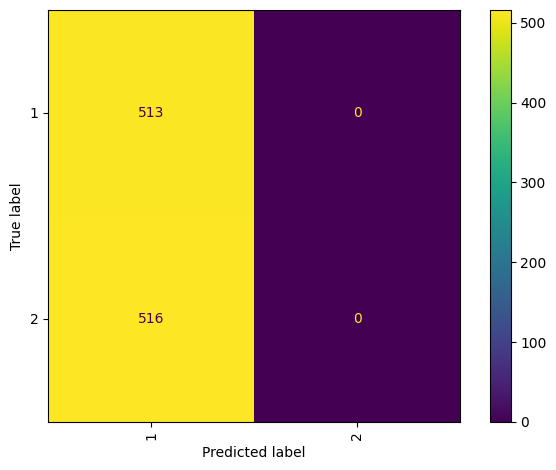

In [8]:
# SETUP & RUN RADIUS NEIGHBORS GRIDSEARCH TRAINING & TESTING

# import the classifier builder from the cloned python files
import ai_engine.sk_classifier_builder as skc

rad = skc.pipeBuild_RadiusNeighborsClassifier(radius=[10])


names=['Radius Neighbors']
pipes=[rad]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameter (CV score=-0.014):
{'tsknn__metric': 'euclidean', 'tsknn__metric_params': None, 'tsknn__n_jobs': None, 'tsknn__n_neighbors': 3, 'tsknn__verbose': 0, 'tsknn__weights': 'uniform'}
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       513
           2       0.95      0.96      0.96       516

    accuracy                           0.96      1029
   macro avg       0.96      0.96      0.96      1029
weighted avg       0.96      0.96      0.96      1029



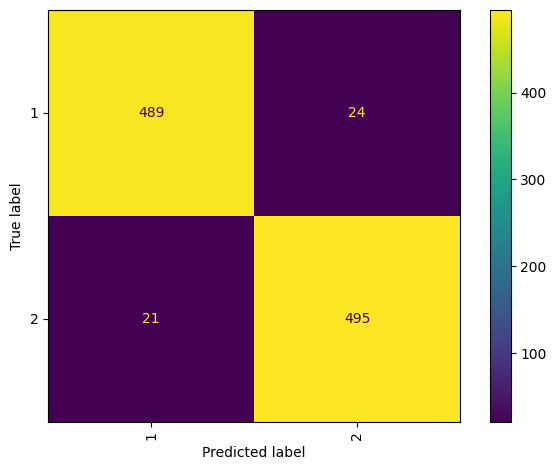

In [9]:
# SETUP & RUN RADIUS NEIGHBORS GRIDSEARCH TRAINING & TESTING
# A TS Learn adaptation of SK Learn's KNN for Time Series data

# import the classifier builder from the cloned python files
import ai_engine.sk_classifier_builder as skc

tsknn = skc.pipeBuild_KNeighborsTimeSeriesClassifier(n_neighbors=[3,5,10],weights=['uniform','distance'],metric=['dtw','softdtw','ctw','euclidean','sqeuclidean','cityblock','sax'])


names=['Time Series KNN']
pipes=[tsknn]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()